# Milestone

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from apyori import apriori
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind
import math
data_path = "./data/"

## 1.EDA

### 1-1. Non-Graphical EDA

In [2]:
# reviews
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['review_scores_rating'].notna()] # drop empty reviews
desc = df["review_scores_rating"].describe() 
desc

count    27627.000000
mean         4.578315
std          0.854467
min          0.000000
25%          4.570000
50%          4.820000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

In [3]:
# price
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['price'].notna()] # drop empty reviews
df = df[df['price'] != 0] # drop $0 lists
desc = df["price"].describe()
desc

count    36887.000000
mean       169.351126
std        299.216651
min         10.000000
25%         70.000000
50%        110.000000
75%        185.000000
max      10000.000000
Name: price, dtype: float64

### 1-2. Graphical EDA

Text(0.5, 0, 'Reviews (0.0 - 5.0)')

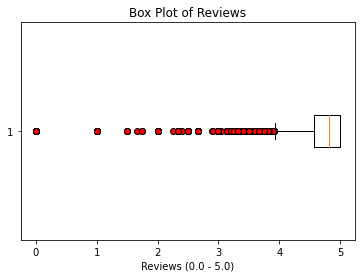

In [4]:
# review box plot
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['review_scores_rating'].notna()] # drop empty reviews
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=df['review_scores_rating'], vert=False, flierprops=red_circle)
plt.title("Box Plot of Reviews")
plt.xlabel("Reviews (0.0 - 5.0)")

Text(0.5, 0, 'Price (USD)')

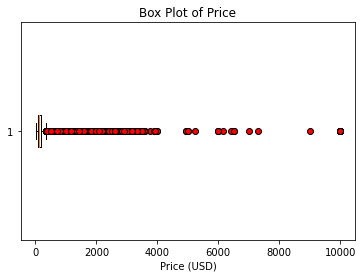

In [5]:
# price box plot
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['price'].notna()] # drop empty reviews
df = df[df['price'] != 0] # drop $0 lists
red_circle = dict(markerfacecolor='red', marker='o')
plt.boxplot(x=df['price'], vert=False, flierprops=red_circle)
plt.title("Box Plot of Price")
plt.xlabel("Price (USD)")

/home/jiwon/miniconda3/envs/cs396/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


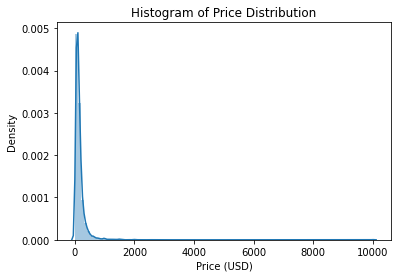

In [6]:
# price histogram with density
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['price'].notna()] # drop empty reviews
df = df[df['price'] != 0] # drop $0 lists
sns.distplot(df['price'], kde=True, bins=100, hist=True)
plt.title("Histogram of Price Distribution")
plt.xlabel("Price (USD)")
plt.show()

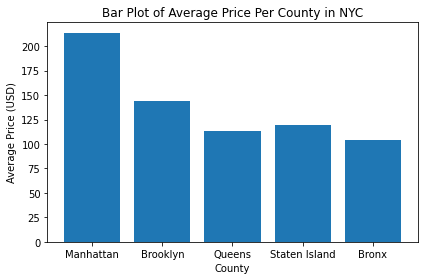

In [92]:
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['neighbourhood_group_cleansed'].notna()] # drop empty county
df = df[df['price'].notna()] # drop empty reviews
county = df["neighbourhood_group_cleansed"].unique() 
avg_price = []
for c in county:
    avg = ((df[df["neighbourhood_group_cleansed"] == c])["price"]).mean()
    avg_price.append(avg)
plt.bar(county, avg_price)
plt.title("Bar Plot of Average Price Per County in NYC")
plt.xlabel("County")
plt.ylabel("Average Price (USD)")
plt.tight_layout()
plt.show()

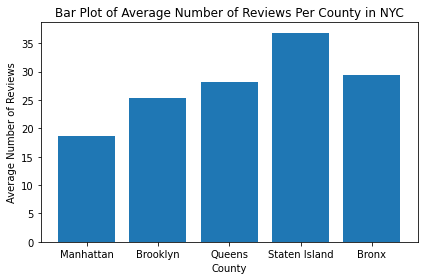

In [7]:
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['neighbourhood_group_cleansed'].notna()] # drop empty county
df = df[df['number_of_reviews'].notna()] # drop empty reviews
county = df["neighbourhood_group_cleansed"].unique() 
avg_review = []
for c in county:
    avg = ((df[df["neighbourhood_group_cleansed"] == c])["number_of_reviews"]).mean()
    avg_review.append(avg)
plt.bar(county, avg_review)
plt.title("Bar Plot of Average Number of Reviews Per County in NYC")
plt.xlabel("County")
plt.ylabel("Average Number of Reviews")
plt.tight_layout()
plt.show()

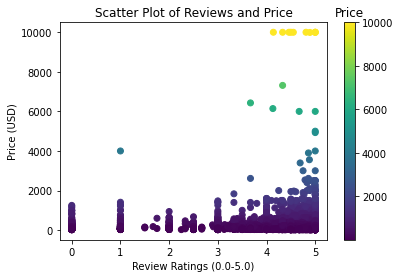

In [19]:
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['price'] != 0] # drop $0 lists
scatter_df = df[['price', 'review_scores_rating']]
drop_na = scatter_df.dropna()
plt.scatter(drop_na["review_scores_rating"], drop_na["price"], c=drop_na['price'], cmap='viridis')
plt.title("Scatter Plot of Reviews and Price")
plt.xlabel("Review Ratings (0.0-5.0)") 
plt.ylabel("Price (USD)")
clb = plt.colorbar() 
clb.ax.set_title('Price')
plt.show()

/tmp/ipykernel_9165/3972780893.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Manhattan', '', 'Brooklyn', '', 'Queens', 'Staten Island', '', 'Bronx'])


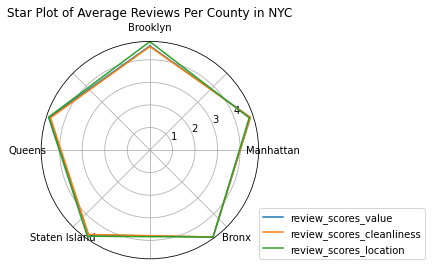

In [91]:
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['neighbourhood_group_cleansed'].notna()] # drop empty county
df = df[df['review_scores_rating'].notna()] # drop empty reviews
county = df["neighbourhood_group_cleansed"].unique() 

avg_value = []
avg_clean = []
avg_location = []
for c in county:
    avg_value.append(((df[df["neighbourhood_group_cleansed"] == c])["review_scores_value"]).mean())
    avg_clean.append(((df[df["neighbourhood_group_cleansed"] == c])["review_scores_cleanliness"]).mean())
    avg_location.append(((df[df["neighbourhood_group_cleansed"] == c])["review_scores_location"]).mean())

avg_value.append(avg_value[0])
avg_clean.append(avg_clean[0])
avg_location.append(avg_location[0])

theta = [math.radians(90), math.radians(162), math.radians(234), math.radians(306),
         math.radians(18), math.radians(90)]
ax = plt.subplot(111, projection='polar')
ax.plot(theta, avg_value, label="review_scores_value")
ax.plot(theta, avg_clean, label="review_scores_cleanliness")
ax.plot(theta, avg_location, label="review_scores_location")
ax.set_xticklabels(['Manhattan', '', 'Brooklyn', '', 'Queens', 'Staten Island', '', 'Bronx'])
plt.title("Star Plot of Average Reviews Per County in NYC")
ax.legend(loc=[1,0])
plt.show()

## 2. Statistical Model

### 2-1. Correlation Analysis

In [3]:
# correlation analysis: host response rate vs. review on communication
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['host_response_rate'].notna()] # drop empty response rate
df = df[df['review_scores_communication'].notna()] # drop empty review scores
pearson = df['host_response_rate'].corr(other=df['review_scores_communication'], method='pearson')
spearman = df['host_response_rate'].corr(other=df['review_scores_communication'], method='spearman')
print("Pearson:", pearson)
print("Spearman:", spearman)

Pearson: 0.1299935274550822
Spearman: 0.1372105386148191


In [4]:
# correlation analysis: acceptance rate vs. number of reviews
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['host_acceptance_rate'].notna()] # drop empty response rate
df = df[df['number_of_reviews'].notna()] # drop empty number of review
pearson = df['host_acceptance_rate'].corr(other=df['number_of_reviews'], method='pearson')
spearman = df['host_acceptance_rate'].corr(other=df['number_of_reviews'], method='spearman')
print("Pearson:", pearson)
print("Spearman:", spearman)

Pearson: 0.1281814686462352
Spearman: 0.16401471577448987


### 2-2. Chi-Squared Test

In [14]:
# superhost vs. high price independent or not
# does superhost tend to have higher price listings?
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['price'] != 0] # drop $0 lists
df = df[df['price'].notna()] # drop empty price
df = df[df['host_is_superhost'].notna()] # drop empty superhost

super_expensive = len(df[(df['host_is_superhost'] == 't') & (df['price'] > 1000)])
super_cheap = len(df[(df['host_is_superhost'] == 't') & (df['price'] <= 1000)])
not_expensive = len(df[(df['host_is_superhost'] == 'f') & (df['price'] > 1000)])
not_cheap = len(df[(df['host_is_superhost'] == 'f') & (df['price'] <= 1000)])

table = [[super_expensive, super_cheap],[not_expensive, not_cheap]]
result = chi2_contingency(table)
stat = result[0]
p = result[1]
dof = result[2]

significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level:
    print('Reject null hypothesis: superhost and price are independent') 
else: 
    print('Fail to reject null hypothesis: we cannot get a conclusion on whether they are independent without more data') 

p value: 0.009850757872282422
Reject null hypothesis: superhost and price are independent


In [17]:
# superhost vs. review rates
# does superhost have higher reviews?
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['review_scores_rating'].notna()] # drop empty price
df = df[df['host_is_superhost'].notna()] # drop empty superhost

super_good = len(df[(df['host_is_superhost'] == 't') & (df['review_scores_rating'] > 4.8)])
super_bad = len(df[(df['host_is_superhost'] == 't') & (df['review_scores_rating'] <= 4.8)])
not_good = len(df[(df['host_is_superhost'] == 'f') & (df['review_scores_rating'] > 4.8)])
not_bad = len(df[(df['host_is_superhost'] == 'f') & (df['review_scores_rating'] <= 4.8)])

table = [[super_good, super_bad],[not_good, not_bad]]
result = chi2_contingency(table)
stat = result[0]
p = result[1]
dof = result[2]

significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level:
    print('Reject null hypothesis: superhost and review rates are independent') 
else: 
    print('Fail to reject null hypothesis: we cannot get a conclusion on whether they are independent without more data') 

p value: 1.8011584344690803e-267
Reject null hypothesis: superhost and review rates are independent


In [22]:
# the cheaper the price, the bad the review
df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['review_scores_rating'].notna()] # drop empty review
df = df[df['price'].notna()] # drop empty host

expensive_good = len(df[(df['price'] > 110) & (df['review_scores_rating'] > 2.5)])
expensive_bad = len(df[(df['price'] > 110) & (df['review_scores_rating'] <= 2.5)])
cheap_good = len(df[(df['price'] <= 110) & (df['review_scores_rating'] > 2.5)])
cheap_bad = len(df[(df['price'] <= 110) & (df['review_scores_rating'] <= 2.5)])

table = [[cheap_bad, cheap_good], [expensive_bad, expensive_good]]
result = chi2_contingency(table)
stat = result[0]
p = result[1]
dof = result[2]

significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level:
    print('Reject null hypothesis: price and review rates are independent') 
else: 
    print('Fail to reject null hypothesis: we cannot get a conclusion on whether they are independent without more data') 

p value: 4.800786657350333e-06
Reject null hypothesis: price and review rates are independent


### 2-3. T-Test

In [23]:
# bronx vs. manhattan
# host has less listings if they are in manhattan
# Null hypothesis: the mean mean listings in Bronx is greater than the mean listings in Manhattan

df = pd.read_csv(data_path + "listings_detail.csv")
df = df[df['calculated_host_listings_count'].notna()] # drop empty listings
bronx_df = df[df['neighbourhood_group_cleansed'] == 'Bronx']
manhattan_df = df[df['neighbourhood_group_cleansed'] == 'Manhattan']

t, p = ttest_ind(bronx_df['calculated_host_listings_count'], manhattan_df['calculated_host_listings_count'], 
                equal_var=False, alternative='greater')
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject null hypothesis: greater mean') 
else: 
    print('Fail to reject null hypothesis: we cannot get a conclusion on whether they are greater without more data')

p value: 1.0
Fail to reject null hypothesis: we cannot get a conclusion on whether they are greater without more data
